# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [3]:
# Data handling
import pandas as pd
import numpy as np


# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Library to split data
from sklearn.model_selection import train_test_split

# Model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Metrics to evaluate the model
from sklearn import metrics
from sklearn import tree

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Evaluation metrics

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
# For tuning the model
from sklearn.model_selection import GridSearchCV

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# setting the precision of floating numbers to 2 decimal points
pd.set_option("display.float_format", lambda x: "%.2f" % x)

## Data Overview

- Observations
- Sanity checks

In [5]:
# Load the dataset
df = pd.read_csv ("C:/Users/Yenu5/Downloads/ExtraaLearn.csv")

In [6]:
# Display the first 5 rows
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.06,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91,Email Activity,No,No,No,No,No,0


In [7]:
# checking the number of rows and columns 
df.shape

(4612, 15)

In [8]:
# copying data to another variable to avoid any changes to original data
data = df.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [10]:
# Check structure of the dataset
data.info

<bound method DataFrame.info of            ID  age current_occupation first_interaction profile_completed  \
0      EXT001   57         Unemployed           Website              High   
1      EXT002   56       Professional        Mobile App            Medium   
2      EXT003   52       Professional           Website            Medium   
3      EXT004   53         Unemployed           Website              High   
4      EXT005   23            Student           Website              High   
...       ...  ...                ...               ...               ...   
4607  EXT4608   35         Unemployed        Mobile App            Medium   
4608  EXT4609   55       Professional        Mobile App            Medium   
4609  EXT4610   58       Professional           Website              High   
4610  EXT4611   57       Professional        Mobile App            Medium   
4611  EXT4612   55       Professional           Website            Medium   

      website_visits  time_spent_on_website

In [11]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df.duplicated()
# Count of duplicate rows
num_duplicates = duplicate_rows.sum()

# Output the result
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 0


In [12]:
# Check for missing values
data.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [13]:
# summary statistics
data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.00,4612.00,4612.00,4612.00,4612.00
mean,46.20,3.57,724.01,3.03,0.30
std,13.16,2.83,743.83,1.97,0.46
min,18.00,0.00,0.00,0.00,0.00
25%,36.00,2.00,148.75,2.08,0.00
50%,51.00,3.00,376.00,2.79,0.00
75%,57.00,5.00,1336.75,3.76,1.00
max,63.00,30.00,2537.00,18.43,1.00


In [14]:
# Select categorical columns (object or boolean type)
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns

# Print each categorical column
print("Categorical Variables:")
for col in categorical_columns:
    print("-", col)


Categorical Variables:
- ID
- current_occupation
- first_interaction
- profile_completed
- last_activity
- print_media_type1
- print_media_type2
- digital_media
- educational_channels
- referral


In [15]:
# Droped the 'ID' column from the Data becasue it is not a feature that describes a category or group
data.drop('ID', axis=1, inplace=True)

# Confirm it's removed
print("Updated columns:")
print(data.columns)


Updated columns:
Index(['age', 'current_occupation', 'first_interaction', 'profile_completed',
       'website_visits', 'time_spent_on_website', 'page_views_per_visit',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral', 'status'],
      dtype='object')


**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

# Q1 . How current occupation affects lead status

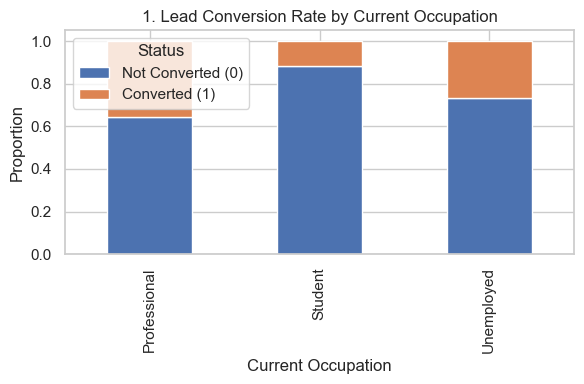

In [18]:
# Current Occupation vs Lead Status
occupation_status = data.groupby('current_occupation')['status'].value_counts(normalize=True).unstack().fillna(0)
occupation_status.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('1. Lead Conversion Rate by Current Occupation')
plt.ylabel('Proportion')
plt.xlabel('Current Occupation')
plt.legend(title='Status', labels=['Not Converted (0)', 'Converted (1)'])
plt.tight_layout()
plt.show()



# Q2. Does the first interaction channel impact conversion?

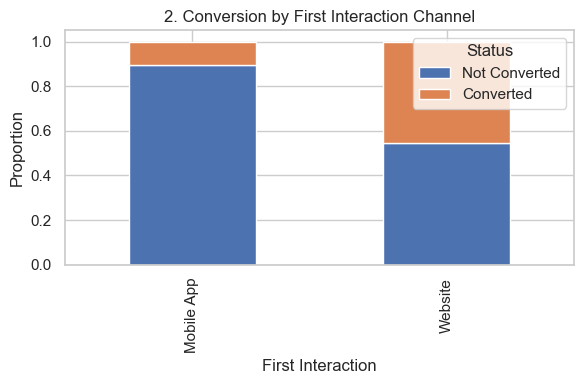

In [20]:
# First Interaction vs Lead Status
first_interaction = data.groupby('first_interaction')['status'].value_counts(normalize=True).unstack().fillna(0)
first_interaction.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('2. Conversion by First Interaction Channel')
plt.ylabel('Proportion')
plt.xlabel('First Interaction')
plt.legend(title='Status', labels=['Not Converted', 'Converted'])
plt.tight_layout()
plt.show()


# Q3. Which last activity type works best?

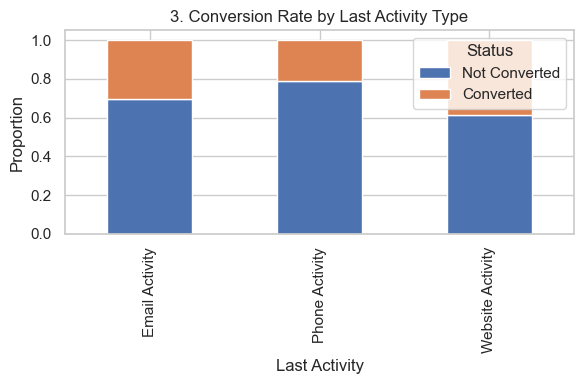

In [22]:
# Last Activity vs Lead Status
last_activity = data.groupby('last_activity')['status'].value_counts(normalize=True).unstack().fillna(0)
last_activity.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('3. Conversion Rate by Last Activity Type')
plt.ylabel('Proportion')
plt.xlabel('Last Activity')
plt.legend(title='Status', labels=['Not Converted', 'Converted'])
plt.tight_layout()
plt.show()


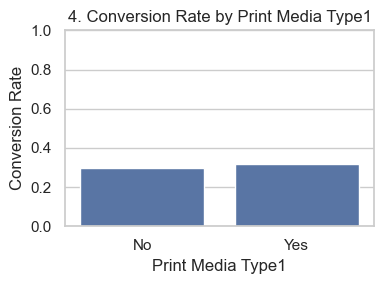

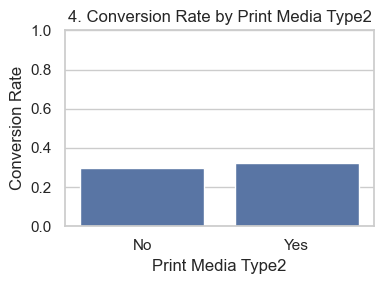

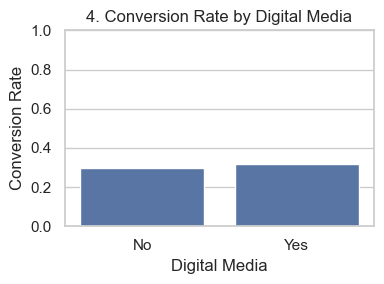

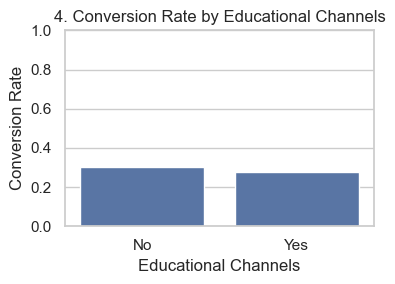

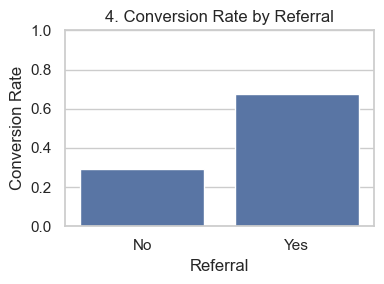

In [23]:
#  Media/Referral Flags vs Conversion Rate
channel_flags = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

for col in channel_flags:
    plt.figure(figsize=(4, 3))
    conv_rate = data.groupby(col)['status'].mean()
    sns.barplot(x=conv_rate.index, y=conv_rate.values)
    plt.title(f'4. Conversion Rate by {col.replace("_", " ").title()}')
    plt.ylabel('Conversion Rate')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


# Q5. Does profile completion improve conversion?

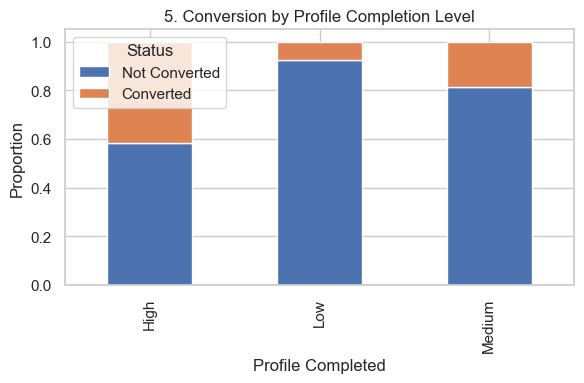

In [25]:
# Profile Completion vs Lead Status
profile_completion = data.groupby('profile_completed')['status'].value_counts(normalize=True).unstack().fillna(0)
profile_completion.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('5. Conversion by Profile Completion Level')
plt.ylabel('Proportion')
plt.xlabel('Profile Completed')
plt.legend(title='Status', labels=['Not Converted', 'Converted'])
plt.tight_layout()
plt.show()


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [27]:
# missing values per column
missing_values = data.isnull().sum()
print(missing_values)


age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64


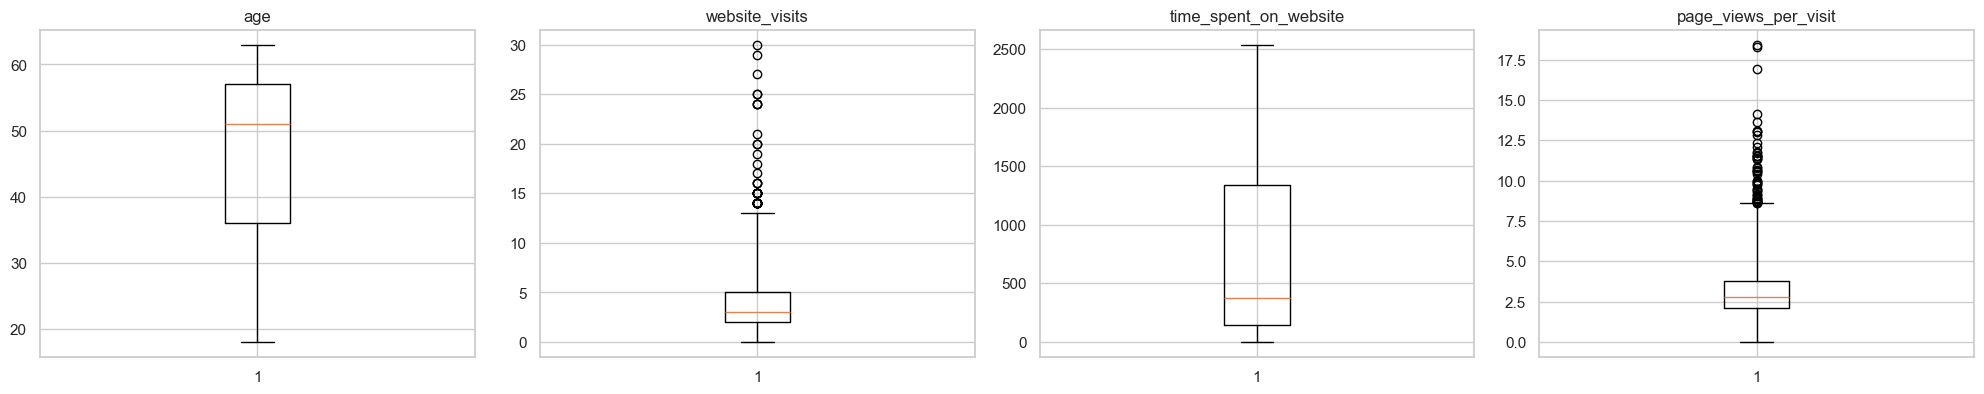

In [28]:
# outlier detection with boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("status")
plt.figure(figsize=(20, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=2.9)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# Preparing data for modeling


In [30]:
# Encoding categorical features import pandas as pd


# Convert Yes/No binary columns to 1/0
binary_cols = ['print_media_type1', 'print_media_type2', 'digital_media',
               'educational_channels', 'referral']

for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

#  One-hot encode categorical columns
cat_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)




In [31]:
# Split features and target
X = data.drop('status', axis=1)  # Feature
y = data['status']               # Target variable



In [32]:
#  Splitting the data into 70% train and 30% test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Output the shape of resulting splits
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}, y_test:  {y_test.shape}")


X_train: (3689, 16), y_train: (3689,)
X_test:  (923, 16), y_test:  (923,)


In [33]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [34]:
def model_performance_classification(model, predictors, target):
   
    # Function to compute different metrics to check classification model performance

   # model: classifier

    # predictors: independent variables

    # target: dependent variable


    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                

    precision = precision_score(target, pred, average = 'macro')           

    acc = accuracy_score(target, pred)                               

    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

## Building a Decision Tree model

In [36]:
# model Train with entropy and balaced
dt_model = DecisionTreeClassifier(
    class_weight='balanced', 
    criterion='entropy', 
    random_state=42
)


In [37]:
# Fitting decision tree model

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [38]:
y_train_pred = dt_model.predict(X_train)


In [39]:
y_test_pred = dt_model.predict(X_test)


## Model Performance evaluation and improvement

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2588
           1       1.00      1.00      1.00      1101

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



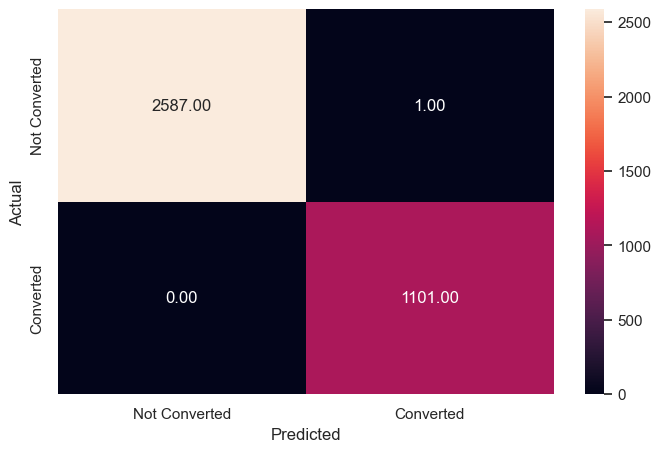

In [41]:
#Checking performance on the training data
y_train_pred2 = dt_model.predict(X_train)

metrics_score(y_train, y_train_pred2 ) 

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       647
           1       0.68      0.65      0.66       276

    accuracy                           0.80       923
   macro avg       0.77      0.76      0.76       923
weighted avg       0.80      0.80      0.80       923



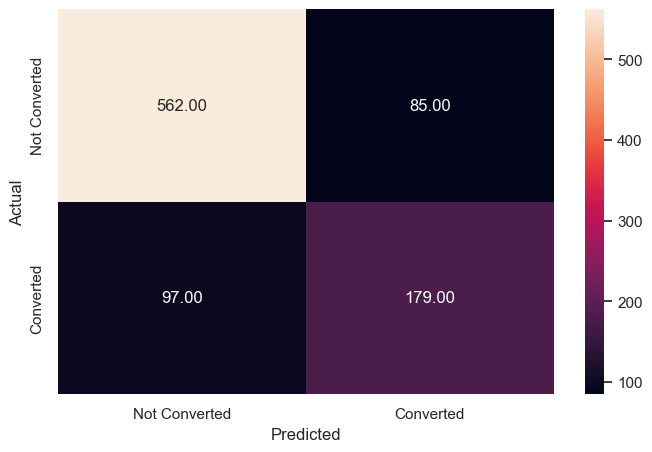

In [42]:
#Checking performance on the test data
y_test_pred2 = dt_model.predict(X_test)

metrics_score(y_test, y_test_pred2) 

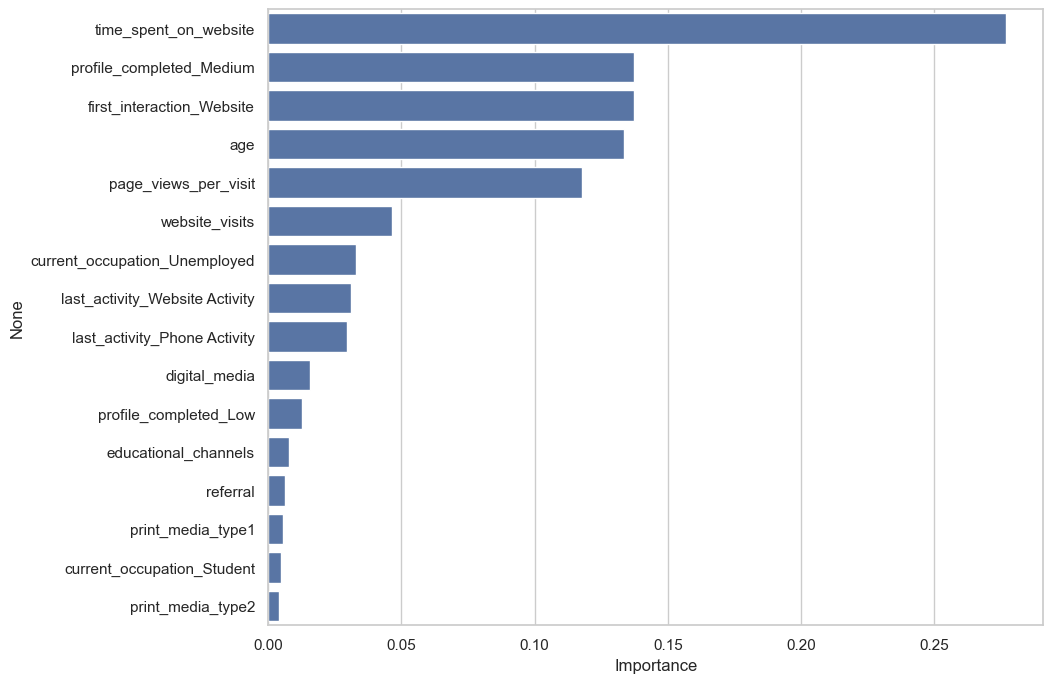

In [43]:
# Plot the feature importance

importances = dt_model.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 8))

sns.barplot(x=importance_df.Importance,y=importance_df.index);

## Hyperparameter Tuning for Decision Tree

In [45]:
# Choose the type of classifier
dtree_tuned = dt_model = DecisionTreeClassifier(
    class_weight='balanced', 
    criterion='entropy', 
    random_state=42
)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_tuned = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=5,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      2588
           1       0.60      0.91      0.72      1101

    accuracy                           0.79      3689
   macro avg       0.77      0.82      0.77      3689
weighted avg       0.84      0.79      0.80      3689



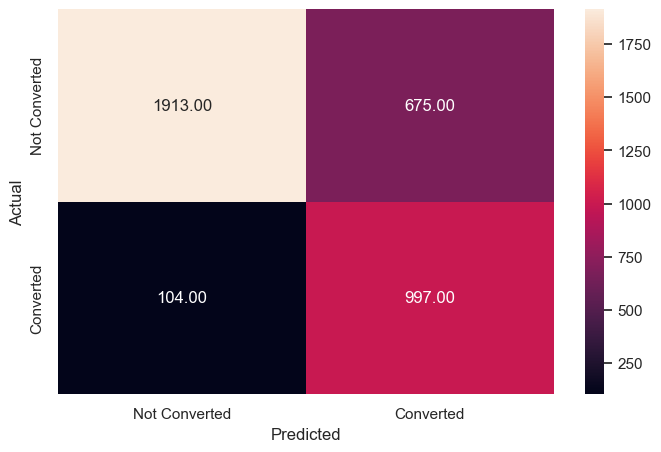

In [46]:
# Checking performance on the training dataset
y_train_pred_dt_tuned = dtree_tuned.predict(X_train)

metrics_score(y_train, y_train_pred_dt_tuned)

              precision    recall  f1-score   support

           0       0.94      0.75      0.84       647
           1       0.60      0.88      0.72       276

    accuracy                           0.79       923
   macro avg       0.77      0.82      0.78       923
weighted avg       0.84      0.79      0.80       923



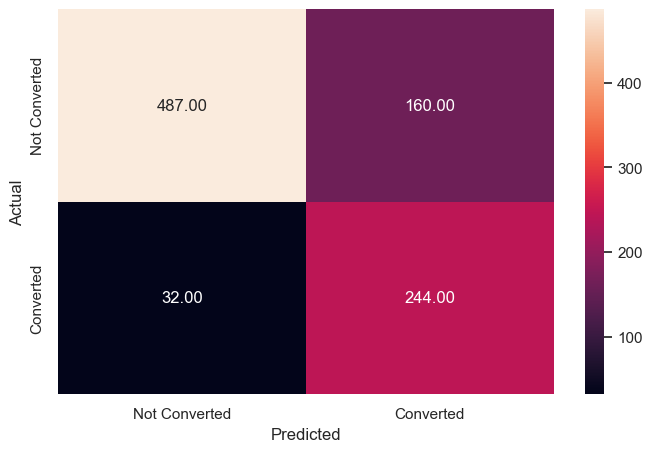

In [47]:
# Checking performance on the test dataset
y_test_pred_dt_tuned = dtree_tuned.predict(X_test)

metrics_score(y_test, y_test_pred_dt_tuned)

In [48]:
dtree_tuned_test = model_performance_classification(dtree_tuned,X_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.77,0.82,0.79


 ## feature importance of this mode

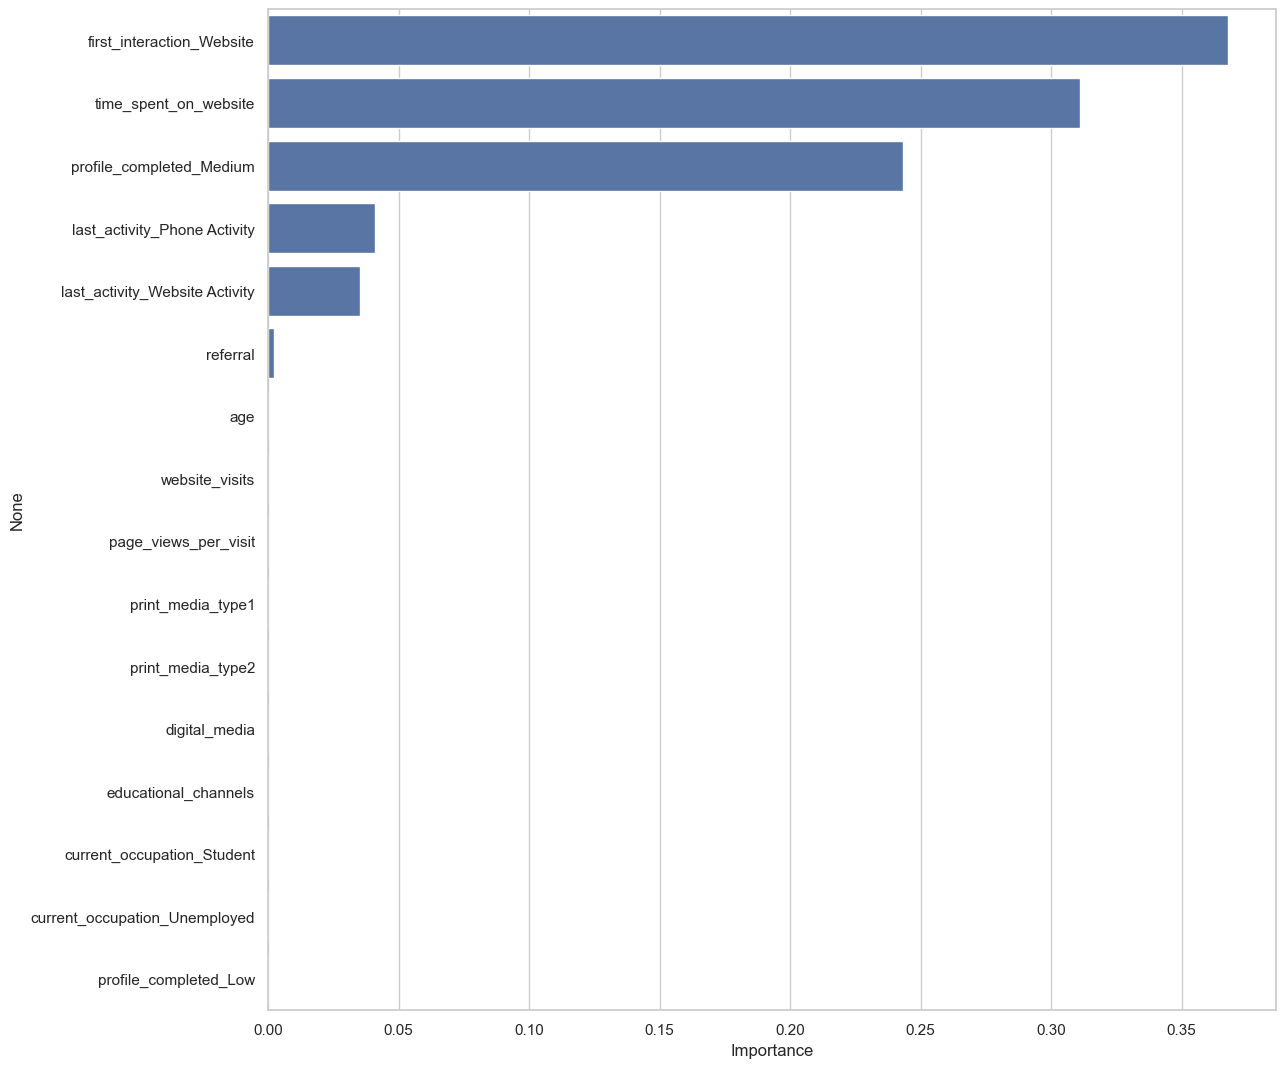

In [50]:
importances = dtree_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y= importance_df.index);

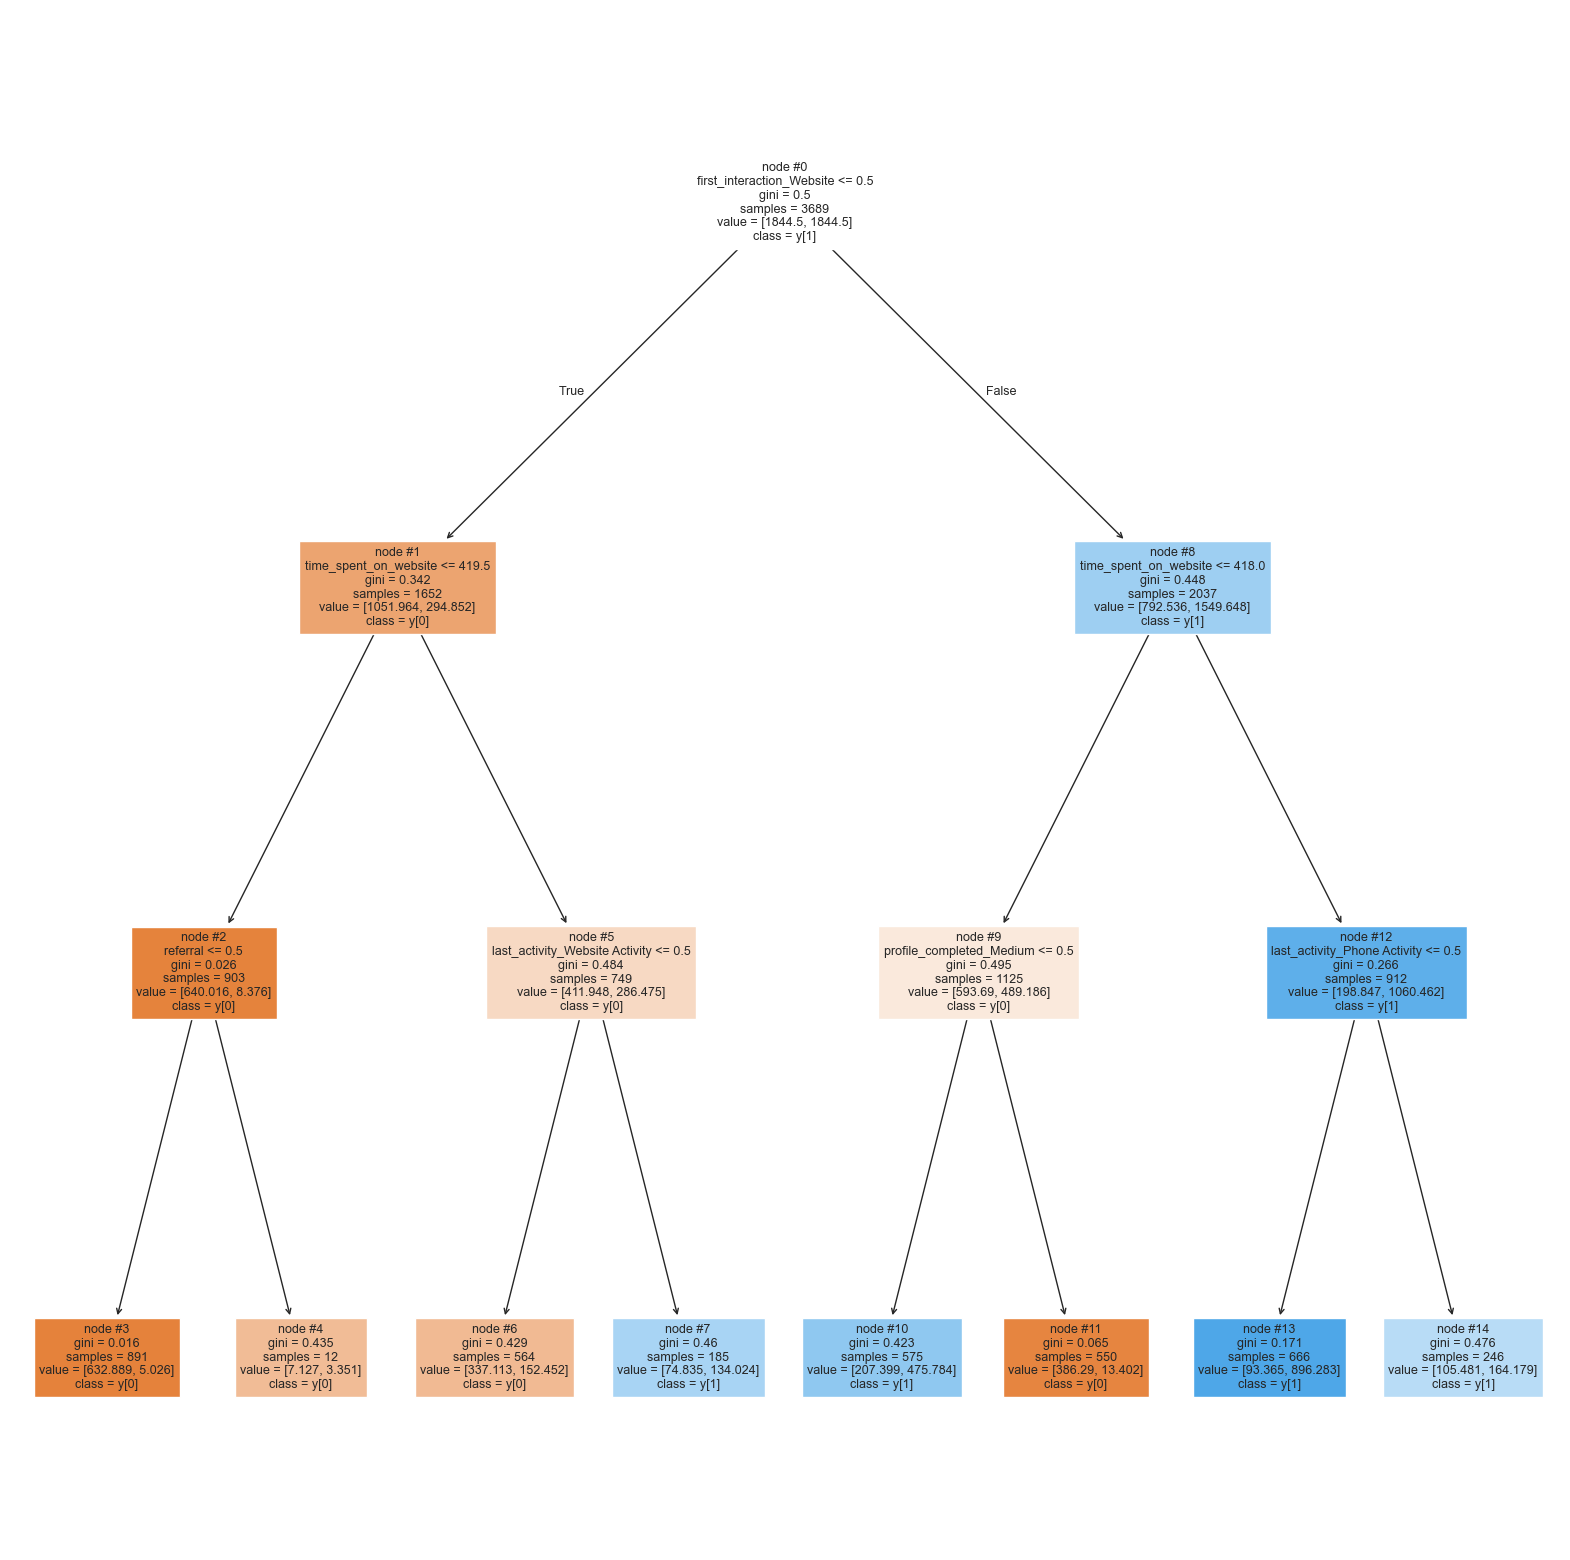

In [51]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(dtree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

## Building a Random Forest model

In [53]:
# Fitting the Random Forest classifier on the training data
rf_model = RandomForestClassifier(
    class_weight='balanced', 
    criterion='entropy', 
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

## Model Performance evaluation and improvement

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2588
           1       1.00      1.00      1.00      1101

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



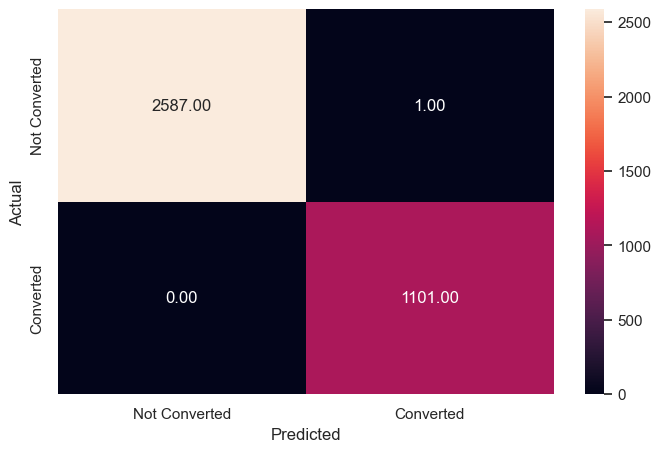

In [55]:
# Checking performance on the training data
y_pred_train_rf = rf_model.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       647
           1       0.80      0.70      0.75       276

    accuracy                           0.86       923
   macro avg       0.84      0.81      0.82       923
weighted avg       0.86      0.86      0.86       923



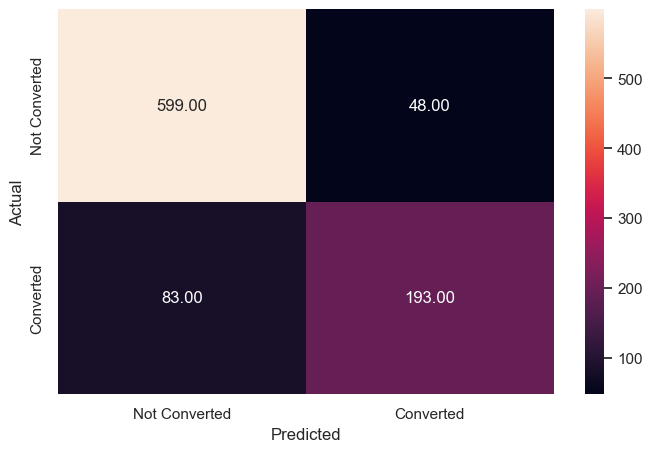

In [56]:
# Checking performance on the testing data
y_pred_test_rf = rf_model.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

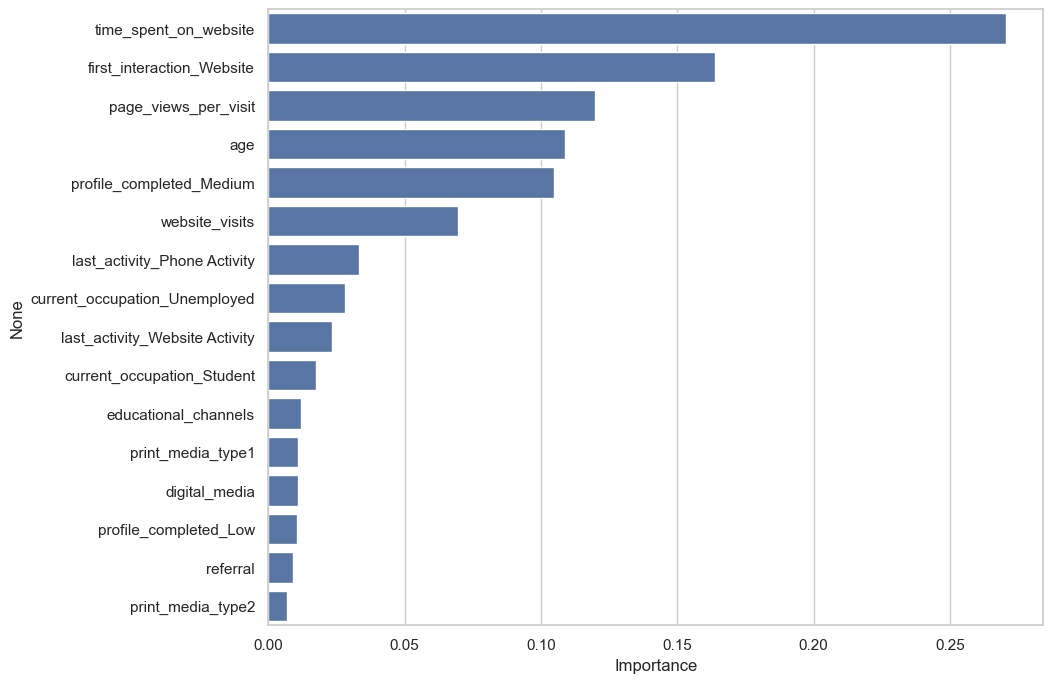

In [57]:
importances = rf_model.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 8))

sns.barplot(x= importance_df.Importance, y=importance_df.index);

In [58]:
# Choose the type of classifier
rf_model_tuned = RandomForestClassifier(
    class_weight='balanced', 
    criterion='entropy', 
    random_state=42
)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_model_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_model_tuned = grid_obj.best_estimator_

In [59]:
rf_model_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=0.7, min_samples_leaf=3, random_state=42)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2588
           1       0.91      0.97      0.94      1101

    accuracy                           0.96      3689
   macro avg       0.95      0.96      0.95      3689
weighted avg       0.96      0.96      0.96      3689



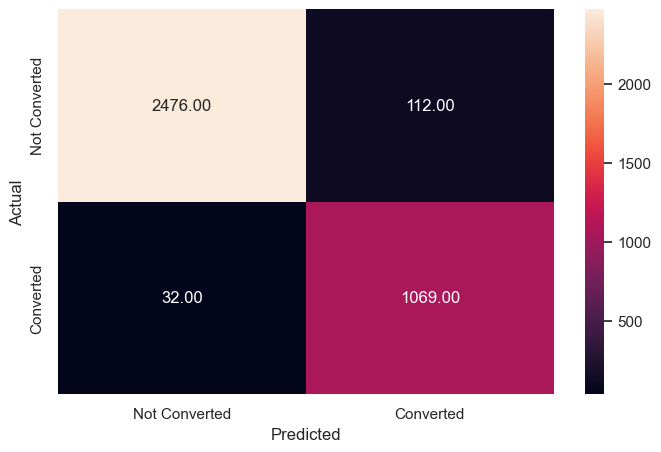

In [60]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_model_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       647
           1       0.76      0.78      0.77       276

    accuracy                           0.86       923
   macro avg       0.83      0.84      0.83       923
weighted avg       0.86      0.86      0.86       923



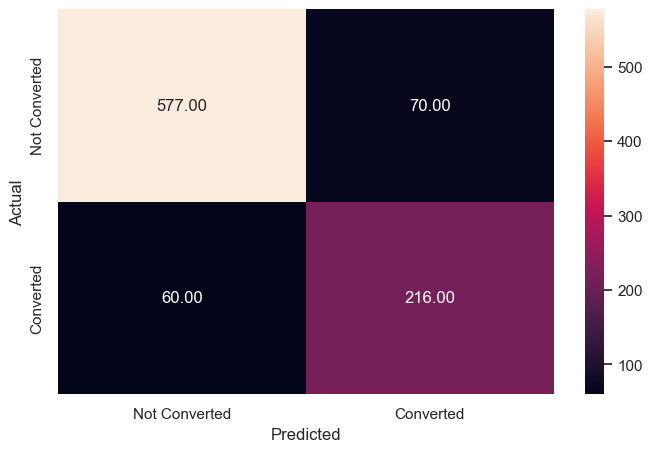

In [61]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_model_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define evaluation function
def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": round(accuracy_score(y_true, y_pred), 3),
        "Precision": round(precision_score(y_true, y_pred), 3),
        "Recall": round(recall_score(y_true, y_pred), 3),
        "F1-Score": round(f1_score(y_true, y_pred), 3)
    }



In [63]:
# Compare multiple models
results = []

results.append(evaluate_model("Decision Tree (Default)", y_test, y_test_pred2))
results.append(evaluate_model("Decision Tree (Tuned)", y_test, y_test_pred_dt_tuned))
results.append(evaluate_model("Random Forest (Default)", y_test, y_pred_test_rf))
results.append(evaluate_model("Random Forest (Tuned)", y_test, y_pred_test_rf_tuned))

# Turn results into DataFrame
comparison_df = pd.DataFrame(results)
comparison_df.set_index("Model", inplace=True)
comparison_df

,Accuracy,Precision,Recall,F1-Score
Model,,,,
Decision Tree (Default),0.80,0.68,0.65,0.66
Decision Tree (Tuned),0.79,0.60,0.88,0.72
Random Forest (Default),0.86,0.80,0.70,0.75
Random Forest (Tuned),0.86,0.76,0.78,0.77


<Figure size 1200x600 with 0 Axes>

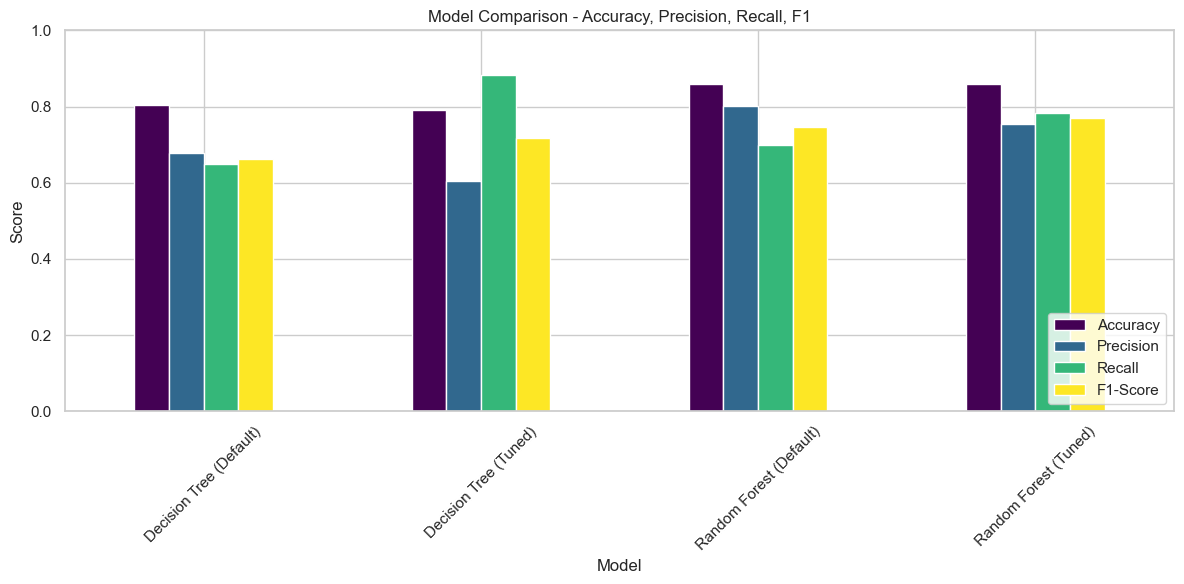

In [64]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
comparison_df.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Model Comparison - Accuracy, Precision, Recall, F1")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## Actionable Insights and Recommendations

1) Tuned Random Forest achieved the best overall performance, with a strong balance of precision (0.76) and recall (0.78), resulting in the highest F1-score (0.77) among all models.

2) Tuned Decision Tree delivered the highest recall (0.88), making it ideal when capturing every potential converted lead is critical — though it came at the cost of lower precision (0.60).

3) Default Random Forest had excellent precision (0.80) and the same accuracy (0.86) as the tuned version, performing strongly even without hyperparameter tuning.

4) Default Decision Tree, while slightly behind, maintained balanced but lower values across all metrics.